In [1]:
%load_ext autoreload
%autoreload 2

from shared.reaction_class import returnReactionTemplates, VirtualFlask

mechs = returnReactionTemplates()


In [2]:
state_network = VirtualFlask(mechs)


intro_input = "O=C1C2=CC=CC=C2C(O1)=O.NC3=CC=CC=C3.BrCCCCC.[OH-]".split(".")

state_network.charge(intro_input, [])
state_network.run_until_done(iters=4, thresh=50000, ring_filter=False, precalc_prods=[])


0.4890401363372803 221


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np


sms = [Chem.CanonSmiles(x) for x in ["CCCCCOC(c1c(C(O)=O)cccc1)=O", "[O-]C(c1c(C(O)=O)cccc1)=O", "O=C(NC1=CC=CC=C1)C2=CC=CC=C2C([O-])=O", "O=C(NC1=CC=CC=C1)C2=CC=CC=C2C(OCCCCC)=O"]]

nodes_of_interest = []
for node in state_network.nodes:
    for nn in state_network.nodes[node].unmapped_smiles.split("."):
        mol = Chem.MolFromSmiles(nn, sanitize=False)
        Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_NONE)
        # print(node, nn)
        exact_mass = Descriptors.ExactMolWt(mol)
        sm = Chem.CanonSmiles(nn)
        if sm in sms:
            nodes_of_interest.append(node)
            print(node)
            print(state_network.nodes[node])
            print("")
        # if np.abs(exact_mass - 311) < 0.5:
        #     print(node)
        #     print(state_network.nodes[node])
        #     print("")

# CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-]

CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O
Smiles: CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O

CCCCC[NH2+]c1ccccc1.O=C([O-])c1ccccc1C(=O)O.[Br-]
Smiles: CCCCC[NH2+]c1ccccc1.O=C([O-])c1ccccc1C(=O)O.[Br-]

CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]
Smiles: CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]

CCCCCOC(=O)c1ccccc1C(=O)O.Nc1ccccc1.[Br-]
Smiles: CCCCCOC(=O)c1ccccc1C(=O)O.Nc1ccccc1.[Br-]

CCCCCNc1ccccc1.O=C([O-])c1ccccc1C(=O)O.[Br-]
Smiles: CCCCCNc1ccccc1.O=C([O-])c1ccccc1C(=O)O.[Br-]

CCCCCO.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[Br-]
Smiles: CCCCCO.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[Br-]

CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-].[OH-]
Smiles: CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-].[OH-]



In [ ]:
#CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O
#CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]
#CCCCCOC(=O)c1ccccc1C(=O)O.Nc1ccccc1.[Br-]
#CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-].[OH-]

['CCCCCBr.Nc1ccccc1.O=C1OC(=O)c2ccccc21.[OH-]', 'CCCCCBr.Nc1ccccc1.O=C1OC([O-])(O)c2ccccc21', 'CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O']
['CCCCCBr.Nc1ccccc1.O=C1OC(=O)c2ccccc21.[OH-]', 'CCCCCBr.O=C1OC([O-])([NH2+]c2ccccc2)c2ccccc21.[OH-]', 'CCCCCBr.O=C1OC([O-])(Nc2ccccc2)c2ccccc21.[OH-]', 'CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]']
['CCCCCBr.Nc1ccccc1.O=C1OC(=O)c2ccccc21.[OH-]', 'CCCCCBr.Nc1ccccc1.O=C1OC([O-])(O)c2ccccc21', 'CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O', 'CCCCCOC(=O)c1ccccc1C(=O)O.Nc1ccccc1.[Br-]']
['CCCCCBr.Nc1ccccc1.O=C1OC(=O)c2ccccc21.[OH-]', 'CCCCCBr.O=C1OC([O-])([NH2+]c2ccccc2)c2ccccc21.[OH-]', 'CCCCCBr.O=C1OC([O-])(Nc2ccccc2)c2ccccc21.[OH-]', 'CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]', 'CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-].[OH-]']


/Users/bmahjour/Documents/projects2023/202405/vf_20240526/virtual_flask_nvm/shared/reaction_class.py:1568: RuntimeWarning: invalid value encountered in divide
  edge_direction = edge_vec / edge_length


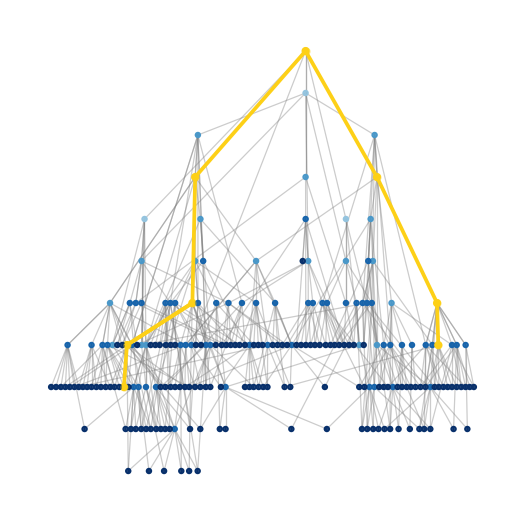

In [5]:
nodes = [
"CCCCCBr.Nc1ccccc1.O=C([O-])c1ccccc1C(=O)O",
"CCCCCBr.O=C([O-])c1ccccc1C(=O)Nc1ccccc1.[OH-]",
"CCCCCOC(=O)c1ccccc1C(=O)O.Nc1ccccc1.[Br-]",
"CCCCCOC(=O)c1ccccc1C(=O)Nc1ccccc1.[Br-].[OH-]"
]

paths = [
    state_network.get_path_from_init_to_node(node) for node in nodes
]

pp = []
for path in paths:
    print(path)
    pp += path


state_network.draw_hypergraph_single_color(
    sub=state_network.nx, name=f"figure4-a", text=False, fig_size=(2, 2), node_size=0.3,
    highlight=pp,
    highlight_color="#FDD017",
    highlight_scale=3,
    try_rooting=False
)

In [6]:
state_network = VirtualFlask(mechs)

intro_input = "O=C1C(Cl)CCCC1.BrC1=C(N)C=CC=C1.O=P(Cl)(Cl)Cl.CS(C)=O".split(".")

state_network.charge(intro_input, [])
state_network.run_until_done(iters=9, thresh=500000, ring_filter=False, precalc_prods=[])
print(len(state_network.nodes))

34.508111238479614 11008
11008


In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

tmol = Chem.CanonSmiles("BrC1=CC=CC=C1NCC2(Cl)C(CCCC2)=O")

tmols = [Chem.CanonSmiles(x) for x in ["BrC1=C(C=CC=C1)NCSC", "O=C2C(Cl)CCCCO2", "BrC3=CC=CC=C3NC"]]
# tmols.append(tmol)
tmols = [Chem.CanonSmiles("O=C1CCCCC1(CNc2c(Br)cccc2)Cl")]
for node in state_network.nodes:
    for nn in state_network.nodes[node].unmapped_smiles.split("."):
        mol = Chem.MolFromSmiles(nn, sanitize=False)
        Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_NONE)
        exact_mass = Descriptors.ExactMolWt(mol)
        # print(node, nn, exact_mass)
        sm_out = Chem.MolToSmiles(mol, isomericSmiles=False)
        if sm_out in tmols:
            print(node)
            print(state_network.nodes[node].propagations)
            print("")
            break
        # if np.abs(exact_mass - 315) < 1:
        #     print(node)
        #     print(state_network.nodes[node])
        #     print("")

C[S-].Cl.O=C1CCCCC1(Cl)CNc1ccccc1Br.O=P([O-])(Cl)Cl
9



In [8]:
import random
end_nodes = []

for i in range(1000):
    nod = random.choice(list(state_network.nodes.keys()))
    p = state_network.get_path_from_init_to_node(nod)
    end_nodes += p

print(len(set(end_nodes)))


2828


In [9]:
#CS(C)=O.O=P(Cl)(Cl)Cl.OC1(Nc2ccccc2Br)CCCCC1Cl
#CNc1ccccc1Br.C[S-].Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl
#C[S+](C)Cl.Nc1ccccc1Br.O=C1OCCCCC1Cl.O=[PH](Cl)Cl
#CSCNc1ccccc1Br.Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl
#C[S-].Cl.O=C1CCCCC1(Cl)CNc1ccccc1Br.O=P([O-])(Cl)Cl


nodes = [
"CS(C)=O.O=P(Cl)(Cl)Cl.OC1(Nc2ccccc2Br)CCCCC1Cl",
"CNc1ccccc1Br.C[S-].Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl",
"C[S+](C)Cl.Nc1ccccc1Br.O=C1OCCCCC1Cl.O=[PH](Cl)Cl",
"CSCNc1ccccc1Br.Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl",
"C[S-].Cl.O=C1CCCCC1(Cl)CNc1ccccc1Br.O=P([O-])(Cl)Cl"
]

paths = [
    state_network.get_path_from_init_to_node(node) for node in nodes
]

pp = []
for path in paths:
    print(path)
    pp += path
    end_nodes += path
print(len(pp))
print(len(set(pp)))
print(len(end_nodes))

['CS(C)=O.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P(Cl)(Cl)Cl', 'CS(C)=O.O=P(Cl)(Cl)Cl.OC1(Nc2ccccc2Br)CCCCC1Cl']
['CS(C)=O.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P(Cl)(Cl)Cl', 'C[S+](C)[O-].Nc1ccccc1Br.O=C1CCCCC1Cl.O=P(Cl)(Cl)Cl', 'CS(C)(Cl)OP(=O)(Cl)Cl.Nc1ccccc1Br.O=C1CCCCC1Cl', 'C[S+](C)Cl.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl', 'C=[S+]C.Cl.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl', 'CSC[NH2+]c1ccccc1Br.Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl', 'CSCNc1ccccc1Br.Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl', 'C=[NH+]c1ccccc1Br.C[S-].Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl', 'C[S-].Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl.[CH2-]Nc1ccccc1Br', 'CNc1ccccc1Br.C[S-].Cl.O=C1CCCCC1Cl.O=P([O-])(Cl)Cl']
['CS(C)=O.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P(Cl)(Cl)Cl', 'CS(C)=O.Nc1ccccc1Br.O=P(Cl)(Cl)Cl.[OH+]=C1CCCCC1Cl', 'C[S+](C)[O-].Nc1ccccc1Br.O=P(Cl)(Cl)Cl.[OH+]=C1CCCCC1Cl', 'CS(C)(Cl)OP(=O)(Cl)Cl.Nc1ccccc1Br.[OH+]=C1CCCCC1Cl', 'C[S+](C)Cl.Nc1ccccc1Br.O=P([O-])(Cl)Cl.[OH+]=C1CCCCC1Cl', 'C[S+](C)Cl.Nc1ccccc1Br.O=P(Cl)(Cl)OC1(O)CCCCC1Cl', 'C[S+](C)Cl.Nc1ccccc1Br.O=C

DiGraph with 2409 nodes and 5007 edges


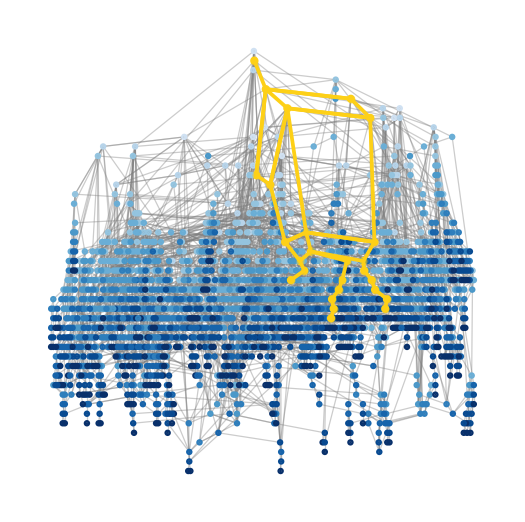

In [22]:
# rr = state_network.nx.subgraph(pp)

sub = state_network.create_subgraph_with_beam_array([100,100,100,50,2,2,2,2,2,2])
print(sub)
for nn in nodes:
    path = state_network.get_path_from_init_to_node(nn)
    for idx,n in enumerate(path):
        if n not in sub.nodes:
            sub.add_node(n)
        if idx < len(path)-1:
            sub.add_edge(n, path[idx+1])
        else:
            continue



# state_network.draw_hypergraph_sub_no_filter(f"figure3-b", sub=end_nodes, highlight=pp)
state_network.draw_hypergraph_single_color(
    sub=sub, name=f"figure4-b", text=False, fig_size=(2, 2), node_size=0.3,
    highlight=pp,
    highlight_color="#FDD017",
    highlight_scale=3,
    try_rooting=False
)

In [17]:
from webkit.etc.util import get_path_from_init_to_node
# node = "C[S-].Cl.O=C1CCCCC1(Cl)CNc1ccccc1Br.O=P([O-])(Cl)Cl"
# path = get_path_from_init_to_node(state_network, node)

state_network.draw_hypergraph_no_filter(f"figure3-b", highlight=pp)


DiGraph with 11008 nodes and 35335 edges


KeyboardInterrupt: 

In [18]:
for i in state_network.edges["C=[NH+]c1ccccc1Br.C[S-].Cl.O=P([O-])(Cl)Cl.[O-]C1=CCCCC1Cl"]:
    print(i)

C=[NH+]c1ccccc1Br.C[S-].O=P([O-])(Cl)Cl.[O-]C1C(Cl)CCCC1Cl
C=[NH+]c1ccccc1Br.C[S-].O=P([O-])(Cl)Cl.[O-]C1(Cl)CCCCC1Cl
CSCNc1ccccc1Br.Cl.O=P([O-])(Cl)Cl.[O-]C1=CCCCC1Cl
C[S-].Cl.O=P(Cl)(Cl)OCNc1ccccc1Br.[O-]C1=CCCCC1Cl
C[S-].Cl.ClC1CCCC=C1OCNc1ccccc1Br.O=P([O-])(Cl)Cl
C=[NH+]c1ccccc1Br.C[S-].Cl.O=C1[CH-]CCCC1Cl.O=P([O-])(Cl)Cl
C=[NH+]c1ccccc1Br.CSC1CCCC=C1[O-].Cl.O=P([O-])(Cl)Cl.[Cl-]
C=[NH+]c1ccccc1Br.C[S-].Cl.O=P(Cl)(Cl)OC1CCCC=C1[O-].[Cl-]
C1=C2OC2CCC1.C=[NH+]c1ccccc1Br.C[S-].Cl.O=P([O-])(Cl)Cl.[Cl-]
C=[NH+]c1ccccc1SC.Cl.O=P([O-])(Cl)Cl.[Br-].[O-]C1=CCCCC1Cl
C=[NH+]c1ccccc1OP(=O)(Cl)Cl.C[S-].Cl.[Br-].[O-]C1=CCCCC1Cl
C=[NH+]c1ccccc1OC1=CCCCC1Cl.C[S-].Cl.O=P([O-])(Cl)Cl.[Br-]
C=Nc1ccccc1Br.C[S-].Cl.O=P([O-])(Cl)Cl.[O-]C1=CCCCC1Cl
C=[NH+]c1ccccc1Br.C[S-].Cl.O=P(O)(Cl)Cl.[O-]C1=CCCCC1Cl
C=[NH+]c1ccccc1Br.C[S-].Cl.O=P([O-])(Cl)Cl.OC1=CCCCC1Cl
C=[NH+]c1ccccc1Br.CS.Cl.O=P([O-])(Cl)Cl.[O-]C1=CCCCC1Cl
C[S-].Cl.O=P([O-])(Cl)Cl.[CH2-]Nc1ccccc1Br.[O-]C1=CCCCC1Cl
C[S-].Cl.O=C1C(Cl)CCCC1CNc1ccccc1

In [11]:
from smarts_helper.webkit.etc.util import get_path_from_init_to_node

get_path_from_init_to_node(state_network, "C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C([O-])=C(Cl)CCCC[N-]c1ccccc1Br")


['CS(C)=O.Nc1ccccc1Br.O=C1CCCCC1Cl.O=P(Cl)(Cl)Cl',
 'CS(C)=O.Nc1ccccc1Br.O=P(Cl)(Cl)Cl.[OH+]=C1CCCCC1Cl',
 'C[S+](C)[O-].Nc1ccccc1Br.O=P(Cl)(Cl)Cl.[OH+]=C1CCCCC1Cl',
 'CS(C)(Cl)OP(=O)(Cl)Cl.Nc1ccccc1Br.[OH+]=C1CCCCC1Cl',
 'C[S+](C)Cl.Nc1ccccc1Br.O=P([O-])(Cl)Cl.[OH+]=C1CCCCC1Cl',
 'C[S+](C)Cl.Nc1ccccc1Br.O=P(Cl)(Cl)OC1(O)CCCCC1Cl',
 'C[S+](C)Cl.Nc1ccccc1Br.O=C1OCCCCC1Cl.O=[PH](Cl)Cl',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1([NH2+]c2ccccc2Br)OCCCCC1Cl',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1(Nc2ccccc2Br)OCCCCC1Cl',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1([O-])C(Cl)CCCC[NH+]1c1ccccc1Br',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1([O-])C(Cl)CCCCN1c1ccccc1Br',
 'C[S+](C)Cl.O=C([O-])C(Cl)CCCC[N-]c1ccccc1Br.O=[PH](Cl)Cl',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C(O)=C(Cl)CCCC[N-]c1ccccc1Br',
 'C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C([O-])=C(Cl)CCCC[N-]c1ccccc1Br']

In [12]:
in_edges = state_network.get_incoming_edges("C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1([O-])C(Cl)CCCC[NH+]1c1ccccc1Br")
for ie in in_edges:
    print(ie[1][0]["reaction_smiles"], ie)

[O-:1][C:2]1([NH:12][c:11]2[c:10]([Br:9])[cH:16][cH:15][cH:14][cH:13]2)[CH:3]([Cl:4])[CH2:5][CH2:6][CH2:7][CH2:8][O:25]1.[O:17]=[PH:18]([Cl:20])[Cl:21].[Cl:19][S+:23]([CH3:22])[CH3:24]>>[O-:1][C:2]1([O-:25])[CH:3]([Cl:4])[CH2:5][CH2:6][CH2:7][CH2:8][NH+:12]1[c:11]1[c:10]([Br:9])[cH:16][cH:15][cH:14][cH:13]1.[O:17]=[PH:18]([Cl:20])[Cl:21].[Cl:19][S+:23]([CH3:22])[CH3:24] ('C[S+](C)Cl.O=[PH](Cl)Cl.[O-]C1(Nc2ccccc2Br)OCCCCC1Cl', [{'propagations': 9, 'reaction_description': 'SN2', 'template_name': 'SN2 | halide/O-sub + amine', 'template_obj': SN2, 'count': 1, 'energy': None, 'template': '[N,P&X3;+0:1].[O,Cl,Br,I;H0;+0:2]-[C;H1,H2,H3;+0:3]>>[+1;N,P&X3:1]-[C;H1,H2,H3;+0:3].[-1;O,Cl,Br,I;H0:2]', 'reaction_smiles': '[O-:1][C:2]1([NH:12][c:11]2[c:10]([Br:9])[cH:16][cH:15][cH:14][cH:13]2)[CH:3]([Cl:4])[CH2:5][CH2:6][CH2:7][CH2:8][O:25]1.[O:17]=[PH:18]([Cl:20])[Cl:21].[Cl:19][S+:23]([CH3:22])[CH3:24]>>[O-:1][C:2]1([O-:25])[CH:3]([Cl:4])[CH2:5][CH2:6][CH2:7][CH2:8][NH+:12]1[c:11]1[c:10]([Br:9])[cH